In [1]:
# utilities
import re 
import string
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score

In [2]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('dataset.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.head(10)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [3]:
print('Size of Dataset : ',df.shape)

Size of Dataset :  (1600000, 6)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
np.sum(df.isnull().any(axis=1))

0

In [6]:
df['target'].unique()

array([0, 4], dtype=int64)

In [7]:
df['target'].nunique()

2

<AxesSubplot: xlabel='target', ylabel='count'>

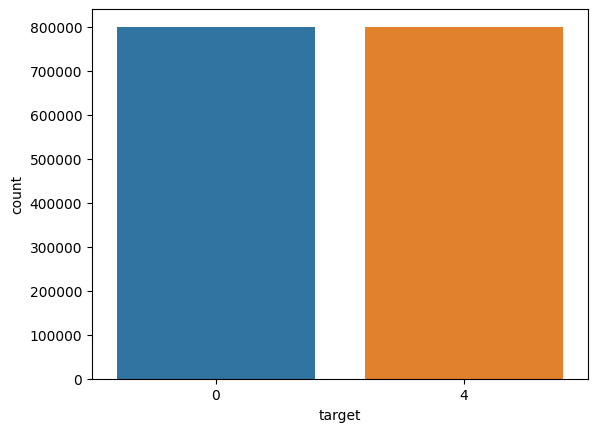

In [8]:
# plotting the distribution for dataset
sns.countplot(x='target', data=df)

In [9]:
# Selecting the text and Target column for our further analysis
data=df[['text','target']]

In [10]:
# Assigning 1 to Positive sentiment 4
data.loc[data['target'] == 4, 'target'] = 1
data['target'].unique()

array([0, 1], dtype=int64)

In [11]:
# Separating positive and negative tweets
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [12]:
# Taking one-fourth of the data
fraction = 0.25 
data_pos = data_pos.sample(frac=fraction, random_state=42)
data_neg = data_neg.sample(frac=fraction, random_state=42)

In [13]:
# Combining positive and negative tweets
dataset = pd.concat([data_pos, data_neg])

In [30]:
dataset.shape

(400000, 2)

In [14]:
dataset.head(10)

,text,target
1012188,Is lookin 4ward to a long weekend really dont...,1
1099036,#myweakness Is music and i live to meet the p...,1
1275978,figured out the Internet on my new iPod,1
1388988,@hillsongunited can't wait to worship with you...,1
938859,@sillybeggar Congrats James !! I'm sure the bo...,1
1564498,@DebbyBruck beautiful! when children smile the...,1
1137706,@bethofalltrades http://twitpic.com/69bs9 - ha...,1
1057163,"@ad_infinitum Why yes, I can. The Ultimate Veg...",1
1432647,getting all the writing off of mee. fun nightt,1
1317320,@noopman Remote? I prefer to be on site. Ther...,1


In [15]:
# Using NLTK stopwords
stopwordlist = set(stopwords.words('english'))

In [16]:
def clean_text(text):
    # Check if the value is missing (NaN)
    if pd.isnull(text):
        return ""

    # Convert to lowercase
    text = text.lower()

    # Remove URLs and numeric values
    text = re.sub('((www.[^s]+)|(https?://[^s]+)|([0-9]+))', ' ', str(text))

    # Remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

    # Remove stopwords
    text = " ".join(word for word in text.split() if word not in stopwordlist)

    return text

In [17]:
# Function to tokenize and lemmatize text
def process_text(text):
    tokens = nltk.word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

In [18]:
# Apply text cleaning and processing
dataset['text'] = dataset['text'].apply(clean_text)
dataset['text'] = dataset['text'].apply(process_text)

In [19]:
dataset.head(10)

,text,target
1012188,"[lookin, ward, long, weekend, really, dont, wa...",1
1099036,"[myweakness, music, live, meet, people, make]",1
1275978,"[figured, internet, new, ipod]",1
1388988,"[hillsongunited, cant, wait, worship, guy, ton...",1
938859,"[sillybeggar, congrats, james, im, sure, book,...",1
1564498,"[debbybruck, beautiful, child, smile, world, s...",1
1137706,"[bethofalltrades, happy, birthday]",1
1057163,"[adinfinitum, yes, ultimate, vegan, guide, eri...",1
1432647,"[getting, writing, mee, fun, nightt]",1
1317320,"[noopman, remote, prefer, site, there, substit...",1


In [20]:
# Separating input feature and label
X = dataset['text']
y = dataset['target']

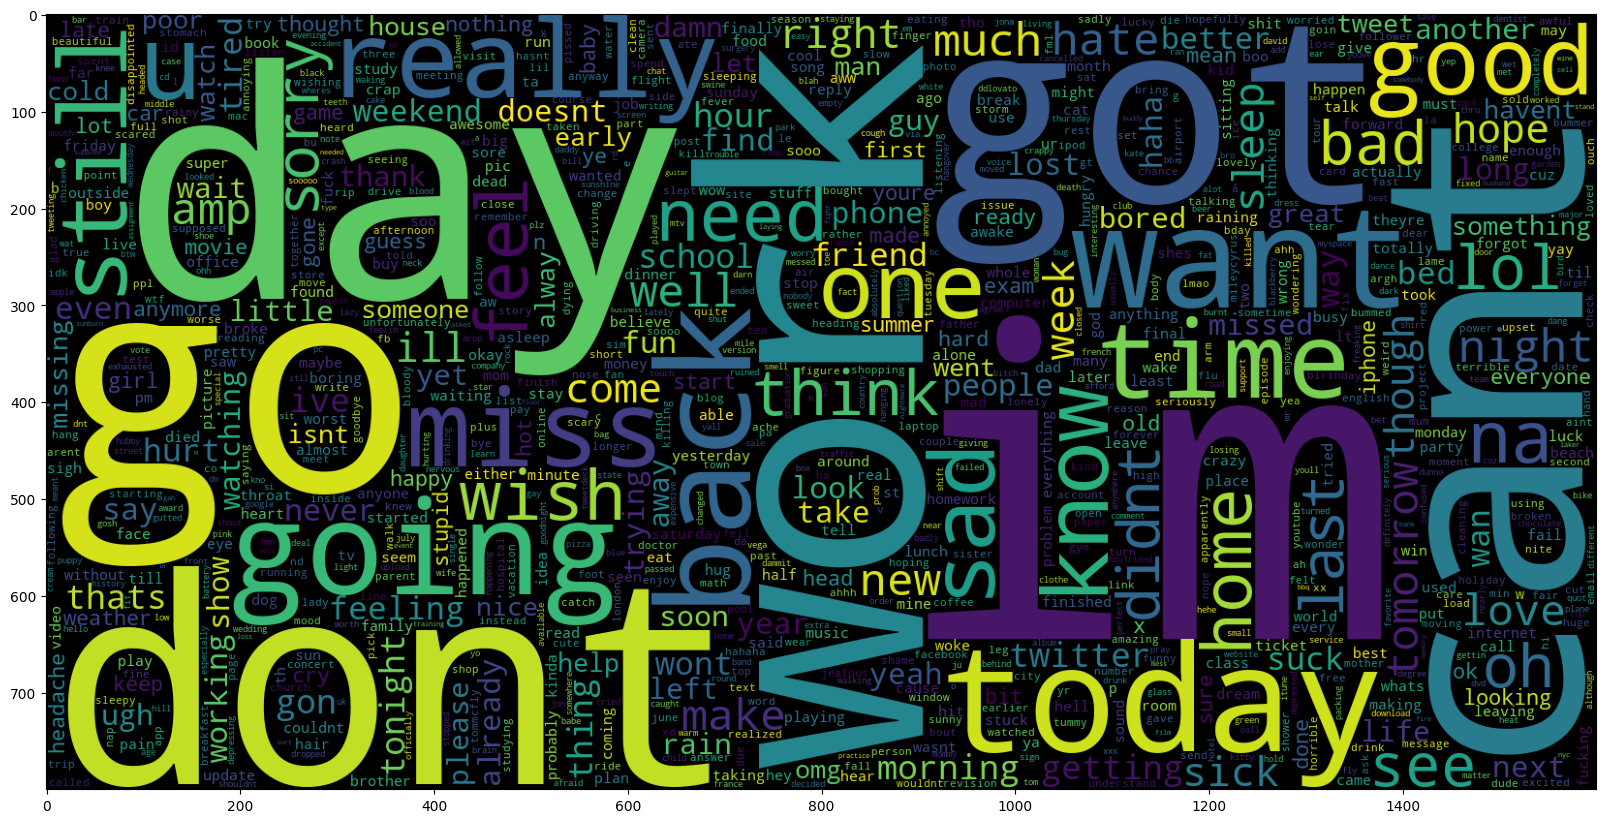

In [21]:
# Plot a cloud of words for negative tweets
data_neg = dataset.loc[dataset['target'] == 0, 'text'].iloc[:800000]
data_neg_words = [word for sublist in data_neg for word in sublist]  # Flatten the list of lists
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data_neg_words))
plt.imshow(wc)

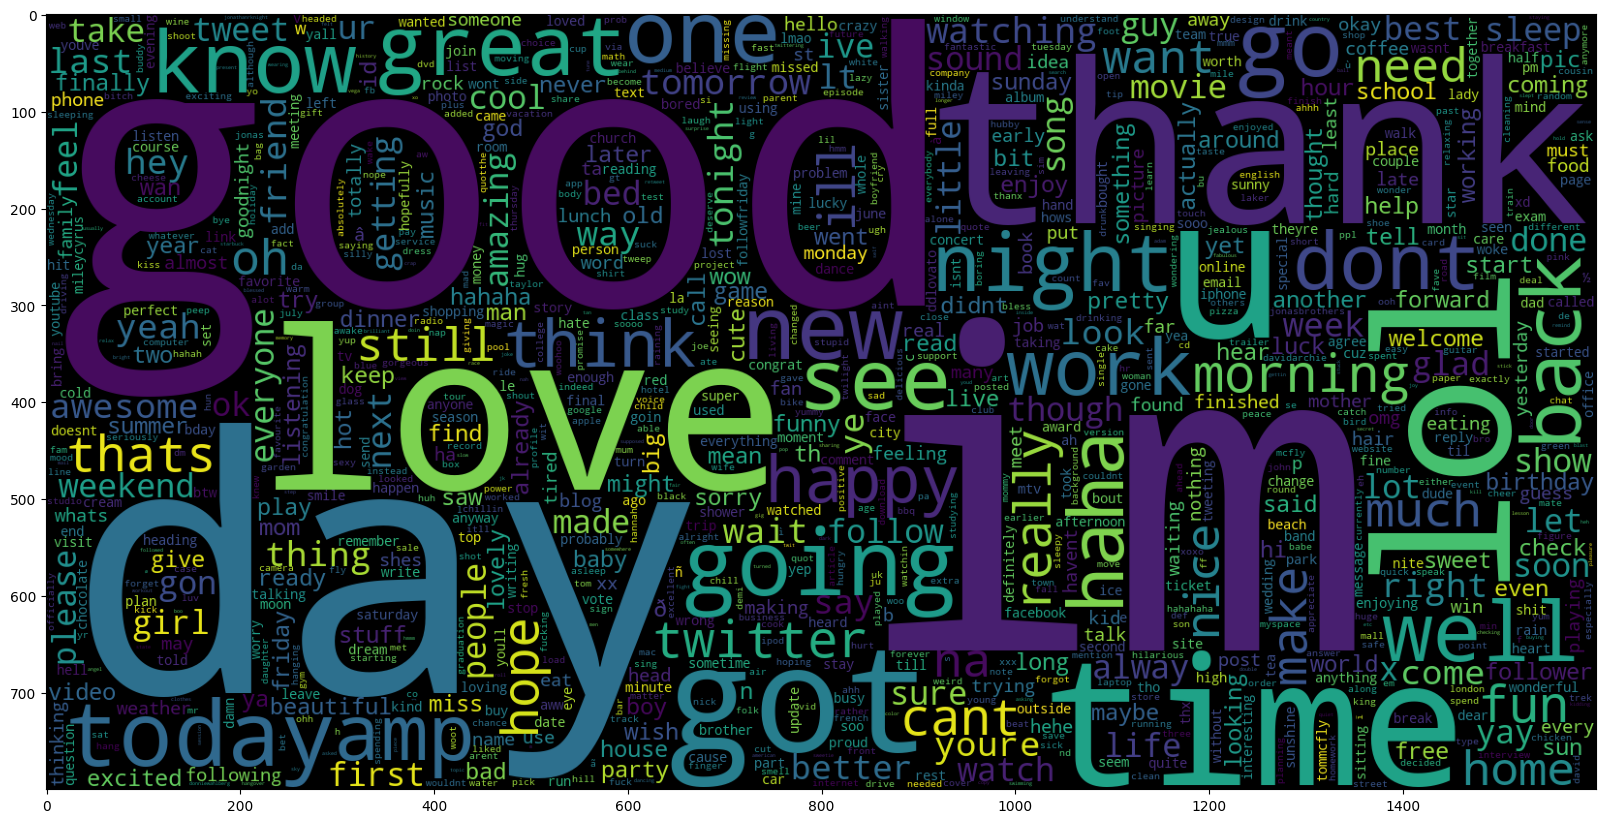

In [22]:
# Plot a cloud of words for positive tweets
data_pos = dataset.loc[dataset['target'] == 1, 'text'].iloc[:800000]
data_pos_words = [word for sublist in data_pos for word in sublist]  # Flatten the list of lists
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data_pos_words))
plt.figure(figsize=(20, 20))
plt.imshow(wc)

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

In [24]:
# Convert the list of tokens back to a string
X_train_str = X_train.apply(lambda tokens: ' '.join(tokens))
X_test_str = X_test.apply(lambda tokens: ' '.join(tokens))

# Fit the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=500000)
vectorizer.fit(X_train_str)

# Transform the data using TF-IDF Vectorizer
X_train_tfidf = vectorizer.transform(X_train_str)
X_test_tfidf = vectorizer.transform(X_test_str)

                 Model  Accuracy  Precision    Recall  F1-Score  \
0          Naive Bayes  0.770308   0.770650  0.770308  0.770236   
1  Logistic Regression  0.784058   0.784123  0.784058  0.784046   
2           Linear SVC  0.774008   0.774020  0.774008  0.774006   

                   Confusion Matrix  
0  [[45153, 14847], [12716, 47284]]  
1  [[46592, 13408], [12505, 47495]]  
2  [[46242, 13758], [13361, 46639]]  


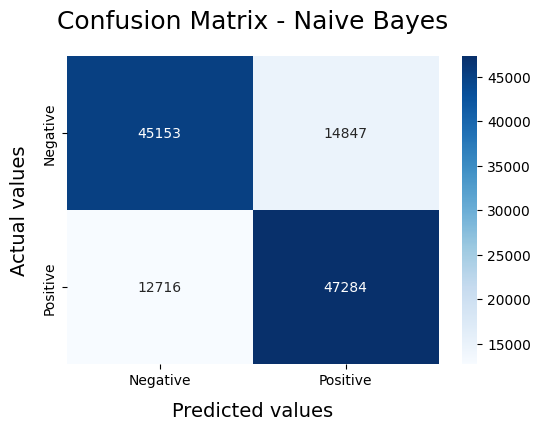

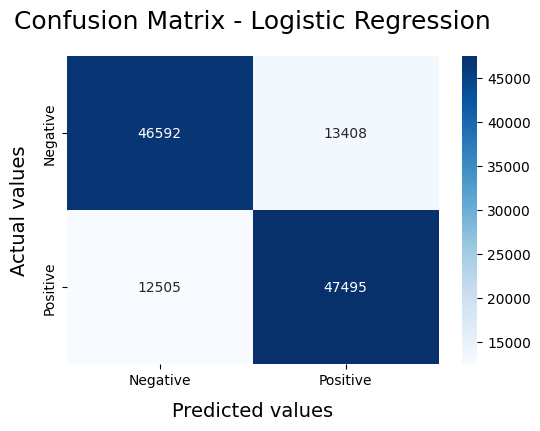

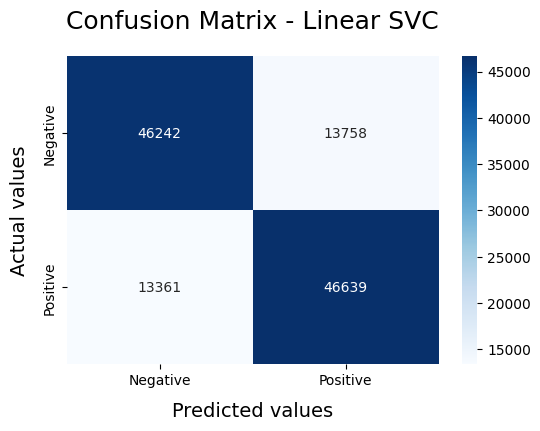

In [25]:
# Function to evaluate and compare multiple models with confusion matrix
def compare_models_with_confusion(models, X_train, X_test, y_train, y_test):
    results = []

    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Predict values for the test dataset
        y_pred = model.predict(X_test)

        # Calculate confusion matrix
        cf_matrix = confusion_matrix(y_test, y_pred)

        # Calculate accuracy and classification report
        accuracy = accuracy_score(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred, output_dict=True)

        # Append results to the list
        results.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': classification_rep['weighted avg']['precision'],
            'Recall': classification_rep['weighted avg']['recall'],
            'F1-Score': classification_rep['weighted avg']['f1-score'],
            'Confusion Matrix': cf_matrix
        })

    # Create a DataFrame for better visualization
    results_df = pd.DataFrame(results)
    return results_df

# Create models
BNBmodel = BernoulliNB()
logistic_model = LogisticRegression(max_iter=1000)
SVCmodel = LinearSVC()

# Create a dictionary of models
models = {
    'Naive Bayes': BNBmodel,
    'Logistic Regression': logistic_model,
    'Linear SVC': SVCmodel
}

# Compare models using the TF-IDF transformed data with confusion matrix
comparison_results_with_confusion = compare_models_with_confusion(models, X_train_tfidf, X_test_tfidf, y_train, y_test)

# Display the comparison results with confusion matrix
print(comparison_results_with_confusion)

# Plot confusion matrices
for model_name, cf_matrix in zip(comparison_results_with_confusion['Model'], comparison_results_with_confusion['Confusion Matrix']):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel("Predicted values", fontdict={'size': 14}, labelpad=10)
    plt.ylabel("Actual values", fontdict={'size': 14}, labelpad=10)
    plt.title(f"Confusion Matrix - {model_name}", fontdict={'size': 18}, pad=20)
    plt.show()


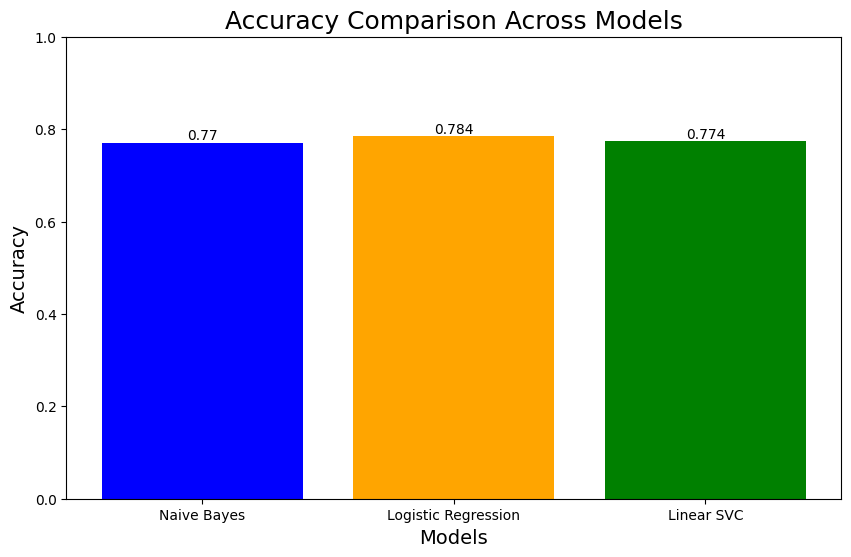

In [26]:
# Function to plot comparison graph for accuracy with numerical values on bars
def plot_accuracy_comparison_with_values(results_df):
    plt.figure(figsize=(10, 6))
    
    bars = plt.bar(results_df['Model'], results_df['Accuracy'], color=['blue', 'orange', 'green'])
    
    # Add numerical values on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom', fontsize=10)
    
    plt.xlabel('Models', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.title('Accuracy Comparison Across Models', fontsize=18)
    plt.ylim(0, 1)  
    plt.show()

# Plot accuracy comparison graph with numerical values on bars
plot_accuracy_comparison_with_values(comparison_results_with_confusion)

# Implementing models on New Dataset

In [27]:
# Reading the example dataset
ex_dataset = pd.read_csv('amazon_reviews.csv', encoding=DATASET_ENCODING)

# Convert 4 and 5 to 1, 1 and 2 to 0, and delete rows with rating 3
ex_dataset['rating'] = ex_dataset['rating'].map({1: 0, 2: 0, 3: np.nan, 4: 1, 5: 1}).astype('Int64')

# Drop rows with NaN values in the rating column
ex_dataset.dropna(subset=['rating'], inplace=True)

# Display the modified dataset
ex_dataset[['review', 'rating']].head(10)

,review,rating
0,I bought this hair oil after viewing so many g...,0
1,Used This Mama Earth Newly Launched Onion Oil ...,1
2,So bad product...My hair falling increase too ...,0
3,Product just smells similar to navarathna hair...,0
4,I have been trying different onion oil for my ...,1
5,I have been using this product for some time n...,1
6,I purchased both oil and shampoo after watchin...,0
7,It's a very good product from mamaearth. The o...,1
9,I used it only one time so I can't say about h...,1
10,I bought this hair oil after viewing so many g...,0


In [28]:
# Applying preprocessing to the 'review' column
ex_dataset['review'] = ex_dataset['review'].apply(clean_text)
ex_dataset['review'] = ex_dataset['review'].apply(process_text)

# Convert the list of tokens back to a string
ex_dataset_str = ex_dataset['review'].apply(lambda tokens: ' '.join(tokens))

# Transform the data using the same TF-IDF Vectorizer used for training
ex_dataset_tfidf = vectorizer.transform(ex_dataset_str)

# Make predictions using each model
predictions = {}
for model_name, model in models.items():
    predicted_sentiment = model.predict(ex_dataset_tfidf)
    predictions[model_name] = predicted_sentiment

# Add the predicted sentiments to the new dataset
for model_name, predicted_sentiment in predictions.items():
    ex_dataset[f'predicted_sentiment_{model_name}'] = predicted_sentiment

# Display the new dataset with predicted sentiments
ex_dataset[['review', 'rating', 'predicted_sentiment_Naive Bayes', 'predicted_sentiment_Logistic Regression', 'predicted_sentiment_Linear SVC']].sample(10)

,review,rating,predicted_sentiment_Naive Bayes,predicted_sentiment_Logistic Regression,predicted_sentiment_Linear SVC
1768,"[doesnt, work, without, bleach, u, selling, co...",0,0,0,0
699,"[good, product]",1,1,1,1
2767,"[using, year, best, soap, ever]",1,1,1,1
1615,"[flavour, good, difficult, resist]",1,1,1,1
1472,"[gem, old, trusted, indian, brand, great, valu...",1,1,1,1
1486,"[decent, soap, fresh, nice, give, good, amount...",1,1,1,1
776,"[returned, product, manufactured, june, buy, n...",0,0,0,0
2045,"[family, tea, drinker, found, best, ever, hadb...",1,1,1,1
171,"[though, pricey, quality, come, price, free, c...",1,0,0,0
829,"[dark, bitter, thats, product, though, took, a...",1,0,0,0


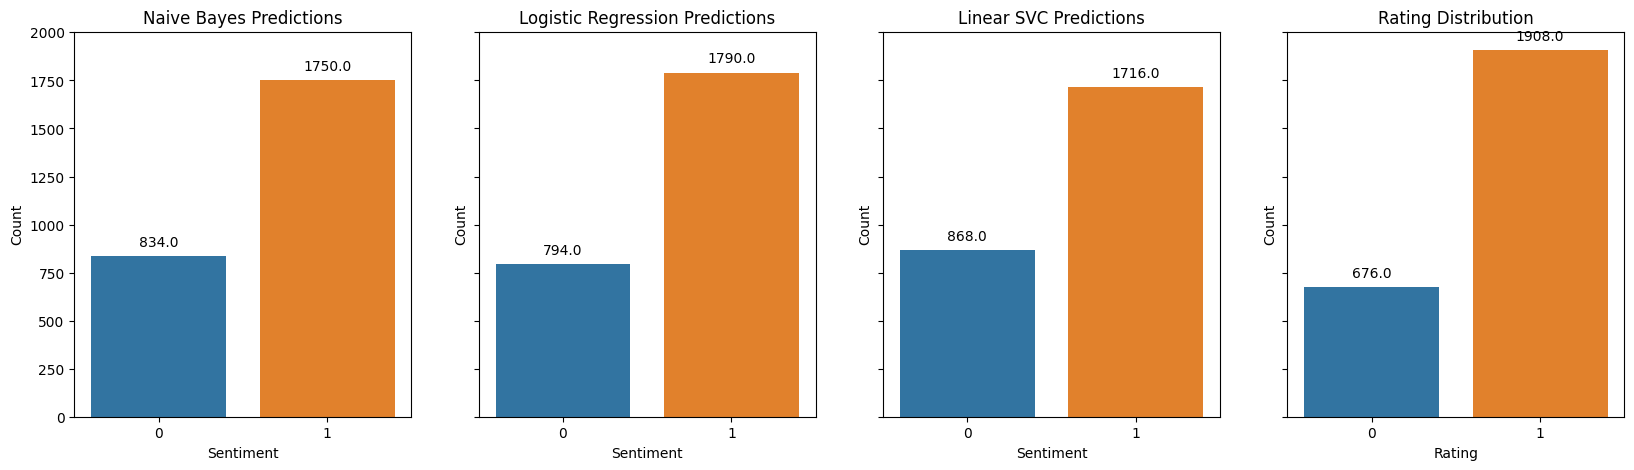

In [31]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=len(models) + 1, figsize=(20, 5), sharey=True)

# Plot predicted sentiments for each model
for i, (model_name, predicted_sentiment) in enumerate(predictions.items()):
    sns.countplot(x=f'predicted_sentiment_{model_name}', data=ex_dataset, ax=axes[i])
    axes[i].set_title(f'{model_name} Predictions')
    axes[i].set_xlabel('Sentiment')
    axes[i].set_ylabel('Count')

    # Annotate each bar with its count
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Plot 'rating' column
sns.countplot(x='rating', data=ex_dataset, ax=axes[-1])
axes[-1].set_title('Rating Distribution')
axes[-1].set_xlabel('Rating')
axes[-1].set_ylabel('Count')

# Annotate each bar with its count
for p in axes[-1].patches:
    axes[-1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()